# Test Microdrive and Nanostage

# Importations

In [1]:
# The conda environment is joystick

In [2]:
import microdrive as md

In [3]:
import nanostage as ns

In [4]:
import time
import numpy as np

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
rc('font', size=9)

# Get handles and test information functions

In [6]:
# md.MCL_MD_ReleaseAllHandles()

md_handle = md.MCL_MD_InitHandle()

# Be careful: do not run twice the InitHandle functions. 

In [7]:
print(md.MCL_MD_Information(md_handle))

(0, 0.05, 9.525e-05, 2.0, 2.0, 2.0, 0.01905)


In [8]:
# ns.MCL_ReleaseAllHandles()

ns_handle = ns.MCL_InitHandle()

In [17]:
for j in range(1, 4, 1):
    print(ns.MCL_GetCalibration(j, ns_handle))

201.371
201.536
201.759


In [10]:
print(ns.MCL_GetSerialNumber(ns_handle))

4446


In [11]:
# The first element returned by a function is the error code. See documentation. 0 is success.

# Test Motion

## Microdrive

In [13]:
axis = 3 # 1 = x, 2 = y, 3 = z
velo = 1 # mm/s
disp = 1 # mm

In [14]:
print('Test displacements specified in distance:')
print(md.MCL_MD_CurrentPositionM(axis, md_handle)) # numbers of microsteps done since beginning of program
md.MCL_MD_Move(axis, velo, -disp, md_handle) # Negative value goes up
time.sleep(3)
print(md.MCL_MD_CurrentPositionM(axis, md_handle)) # This function does not work if the microdrive is moving
md.MCL_MD_Move(axis, velo, disp, md_handle)
time.sleep(3)
print(md.MCL_MD_CurrentPositionM(axis, md_handle))

Test displacements specified in distance:
(0, 0)
(0, -10499)
(0, 0)


In [15]:
print(md.MCL_MD_CurrentPositionM(axis, md_handle))
# print()
disp10 = disp / 10
for i in range(10):
    md.MCL_MD_Move(axis, velo, -disp10, md_handle) 
    md.MCL_MD_MicroDriveWait(md_handle) # Wait until previous motions are done
    # time.sleep(1)
    # print(md.MCL_MD_CurrentPositionM(axis, md_handle))
# print()
md.MCL_MD_Move(axis, velo, disp, md_handle) 
time.sleep(2)
print(md.MCL_MD_CurrentPositionM(axis, md_handle))

(0, 0)
(0, -1)


In [16]:
# Decalage of one microstep

In [17]:
# Test displacements specified in microsteps
print('Initial position')
print(md.MCL_MD_CurrentPositionM(axis, md_handle))

dispM = 1000
dispM10 = int(dispM / 10)

print('Motion')

for i in range(10):
    md.MCL_MD_MoveM(axis, velo, -dispM10, md_handle) 
    md.MCL_MD_MicroDriveWait(md_handle)

md.MCL_MD_MoveM(axis, velo, dispM, md_handle) 
md.MCL_MD_MicroDriveWait(md_handle)

print('Position after motion')
print(md.MCL_MD_CurrentPositionM(axis, md_handle))

Initial position
(0, -1)
Motion
Position after motion
(0, -1)


In [18]:
# Better to move the microdrive in microsteps to avoid rounding 

# One microstep is 95.25 nm
# Ranges of motion: x, y = 25 mm, z = 50 mm

In [ ]:
md.MCL_MD_ReleaseAllHandles()

## Nanostage

### Test Displacements

In [19]:
ns.MCL_SingleReadZ(ns_handle)

9.750824193659042e-05

In [20]:
ns.MCL_MonitorN(0, 1, ns_handle)

0.048299984670374115

In [21]:
ns.MCL_SingleReadN(2, ns_handle)

0.029636647294659566

In [22]:
ns.MCL_SingleWriteZ(0, ns_handle)

0

In [23]:
ns.MCL_SingleReadZ(ns_handle)

0.00019501648387318084

In [24]:
for i in range(1, 4, 1):
    ns.MCL_SingleWriteN(0, i, ns_handle)
    time.sleep(0.3)
    print(ns.MCL_SingleReadN(i, ns_handle))

0.039979383820304214
0.028210827916064905
0.0002925247258097713


In [27]:
for i in range(1, 4, 1):
    print(ns.MCL_SingleReadN(i, ns_handle))

0.0
0.0030553220006792814
0.0003900329677463617


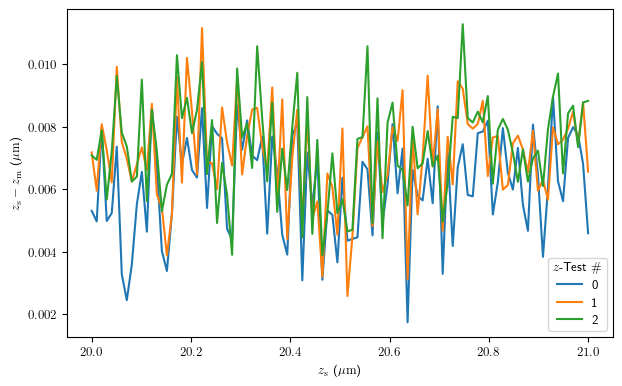

In [36]:
# Test z direction

fig, ax = plt.subplots(1,1,figsize=(16/2.54, 10/2.54))

# Go to 0
ns.MCL_SingleWriteZ(0, ns_handle)
time.sleep(1)

# Input
z_start, z_stop = 20, 21

distances = np.linspace(z_start, z_stop, 100)

N = 3
offset = []

for j in range(N):
    # Go the desired first value
    ns.MCL_SingleWriteZ(z_start, ns_handle)
    time.sleep(1)
    temp = []
    # Loop over wanted distances
    for i in distances:
        ns.MCL_SingleWriteZ(i, ns_handle)
        time.sleep(0.1)
        a = ns.MCL_SingleReadZ(ns_handle)
        temp.append(i - a)
    offset.append(temp)
    ax.plot(distances, temp, label=str(j))

ax.legend(title=r'$z$-Test \#')
ax.set(xlabel=r'$z_\mathrm{s}$ ($\mathrm{\mu m}$)', ylabel=r'$z_\mathrm{s} - z_\mathrm{m}$ ($\mathrm{\mu m}$)')

plt.tight_layout()
plt.show()

In [37]:
# fig.savefig('test_nanostage_offset_z_bis.pdf')

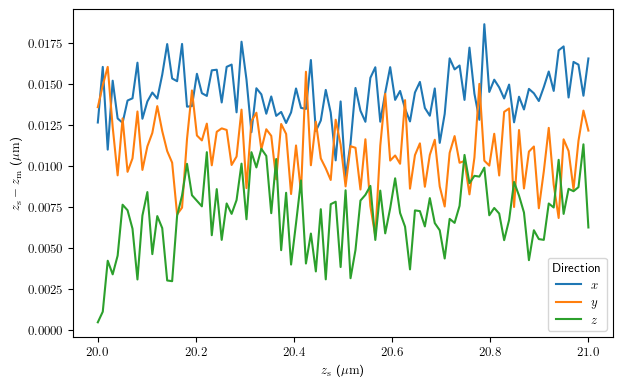

In [44]:
# Test x, y, z directions

fig, ax = plt.subplots(1,1,figsize=(16/2.54, 10/2.54))

# Go to 0
for i in range(1, 4, 1):
    ns.MCL_SingleWriteN(0, i, ns_handle)
    time.sleep(0.3)

# Input
x_start, x_stop = 20, 21
# y_start, y_stop = 20, 60
# z_start, z_stop = 20, 60

# starts = [x_start, y_start, z_start]

# distances_x = np.linspace(x_start, x_stop, 100)
# distances_y = np.linspace(y_start, y_stop, 100)
# distances_z = np.linspace(z_start, z_stop, 100)

distances = np.linspace(x_start, x_stop, 100)

# Initialize list to store offsets
offset = []

labels = ['$x$', '$y$', '$z$']

# Loop over the directions
for j in range(1, 4, 1):
    # Go the desired first value
    ns.MCL_SingleWriteN(x_start, j, ns_handle)
    time.sleep(0.3)
    temp = []
    # Loop over wanted distances
    for i in distances:
        ns.MCL_SingleWriteN(i, j, ns_handle)
        time.sleep(0.1)
        a = ns.MCL_SingleReadN(j, ns_handle)
        temp.append(i - a)
    offset.append(temp)
    ax.plot(distances, temp, label=labels[j-1])

ax.legend(title=r'Direction')
ax.set(xlabel=r'$z_\mathrm{s}$ ($\mathrm{\mu m}$)', ylabel=r'$z_\mathrm{s} - z_\mathrm{m}$ ($\mathrm{\mu m}$)')

plt.tight_layout()
plt.show()

In [45]:
# fig.savefig('test_nanostage_offset_xyz_ter.pdf')

In [46]:
for i in range(1, 4, 1):
    ns.MCL_SingleWriteN(0, i, ns_handle)
    time.sleep(0.3)
    print(ns.MCL_SingleReadN(i, ns_handle))

0.0022323476633094616
0.0002036881227478292
0.0


In [47]:
for i in range(1, 4, 1):
    print(ns.MCL_SingleReadN(i, ns_handle))

0.0
0.0018331931047304623
0.0


### Test Wave Functions

In [12]:
start, stop = 0, 999
N = 10
ttt = np.linspace(start, stop, N)
waveform = np.sin(np.array([float(ttt[i]) for i in range(len(ttt))]))

ns.MCL_ReadWaveFormN(1, 10, 1, ns_handle)


(0, [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0])

In [16]:
ns.MCL_LoadWaveFormN(1, 10, 1, waveform, ns_handle) 

TypeError: MCL_LoadWaveFormN(): incompatible function arguments. The following argument types are supported:
    1. (arg0: int, arg1: int, arg2: float, arg3: float, arg4: int) -> tuple[int, float]

Invoked with: 1, 10, 1, array([ 0.        , -0.86455145,  0.86895084, -0.00882117, -0.86008478,
        0.87328261, -0.01764165, -0.85555119,  0.87754643, -0.02646075]), 1

In [15]:
ns.MCL_ReadWaveFormN(1, 10, 1, ns_handle)


(0, [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0])

# Finish operations 

In [84]:

ns.MCL_ReleaseAllHandles()

# Recap: Useful Functions